In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./diamonds.csv")

Examinamos nuestros datos.

In [2]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
del df['Unnamed: 0'] # borramos la primera columna que no dice nada

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


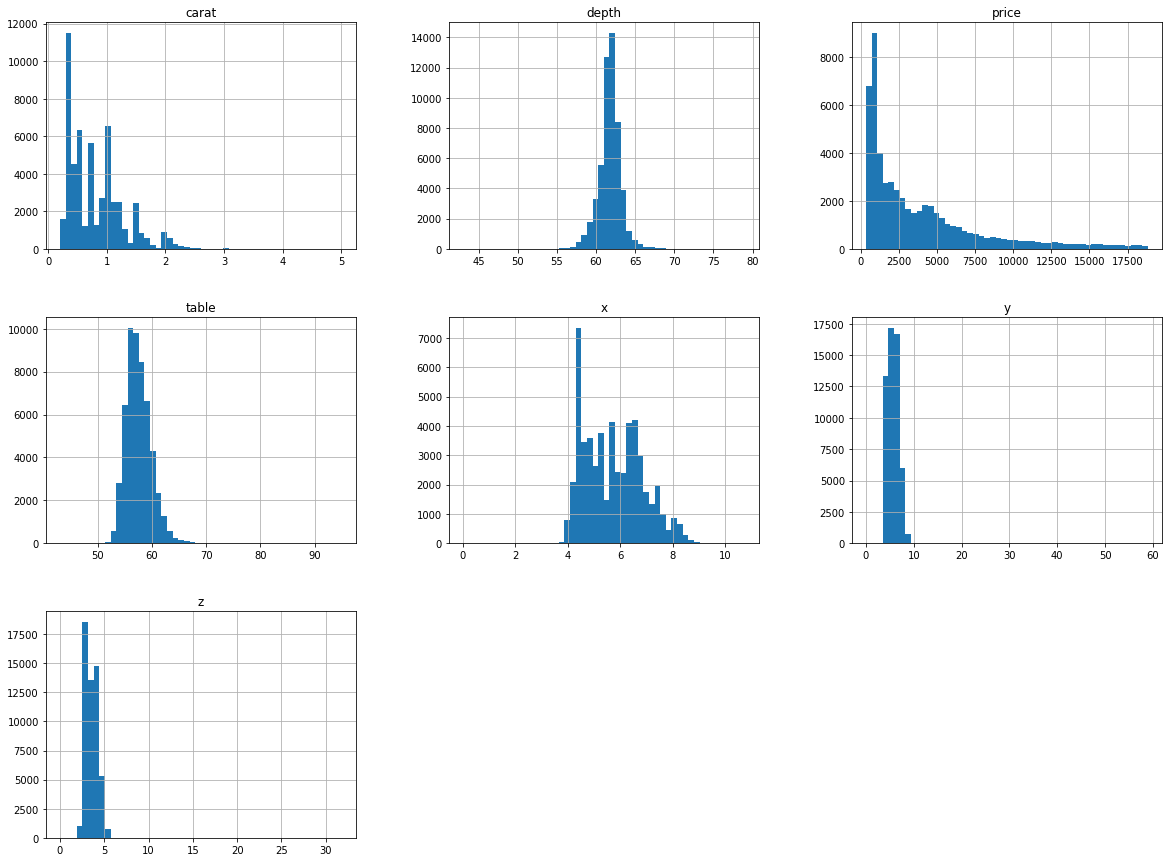

In [5]:
%matplotlib inline
#import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [6]:
# Get counts for each value of a categorical feature in dataset
print (df['cut'].value_counts())
print (df['color'].value_counts())
print (df['clarity'].value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


In [7]:
df.shape

(53940, 10)

Aplicamos one-hot encoding para transformar las características en numéricas.

In [8]:
df = pd.concat([df, pd.get_dummies(df['cut'],prefix='cut',prefix_sep='_')], axis=1)
df.drop('cut',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['color'],prefix='color',prefix_sep='_')], axis=1)
df.drop('color',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['clarity'],prefix='clarity',prefix_sep='_')], axis=1)
df.drop('clarity',axis=1,inplace=True)

In [9]:
df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [10]:
df.shape

(53940, 27)

In [11]:
df.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,...,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.029848,0.090953,0.399537,...,0.100519,0.052058,0.013737,0.033185,0.242214,0.170449,0.151483,0.227253,0.067760,0.093919
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.170169,0.287545,0.489808,...,0.300694,0.222146,0.116400,0.179121,0.428427,0.376030,0.358522,0.419061,0.251337,0.291719
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Vamos a usar una regresión lineal para la variable "precio" contra todo el resto de características. Así dividimos el dataset en "train" y "test". Lo entrenamos en "train" y lo marcamos en "test". Las características se normalizan usando la función de Regresión Lineal de scikit.

In [12]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, y_train)
score = regr.score(X_test, y_test)
mse = np.mean((regr.predict(X_test) - y_test) ** 2)
print (score, mse)

0.9189035191953717 1289176.2756766777


In [14]:
feats = X.columns
feat_dict = dict(zip(feats,regr.coef_))
feat_dict

{'carat': 11278.899697567012,
 'depth': -63.637141073059304,
 'table': -24.204492667104937,
 'x': -1005.602128780457,
 'y': -5.696924886911998,
 'z': -35.264088262347784,
 'cut_Fair': -5123353244192519.0,
 'cut_Good': -5123353244191918.0,
 'cut_Ideal': -5123353244191638.0,
 'cut_Premium': -5123353244191730.0,
 'cut_Very Good': -5123353244191770.0,
 'color_D': -1732001726680422.5,
 'color_E': -1732001726680644.5,
 'color_F': -1732001726680704.2,
 'color_G': -1732001726680922.8,
 'color_H': -1732001726681428.0,
 'color_I': -1732001726681907.8,
 'color_J': -1732001726682794.0,
 'clarity_I1': -5360779100732603.0,
 'clarity_IF': -5360779100727224.0,
 'clarity_SI1': -5360779100728905.0,
 'clarity_SI2': -5360779100729893.0,
 'clarity_VS1': -5360779100727998.0,
 'clarity_VS2': -5360779100728326.0,
 'clarity_VVS1': -5360779100727583.0,
 'clarity_VVS2': -5360779100727634.0}

Como el precio varía de 200$ a 10000 vamos a probar usando "log(price)".

In [15]:
df['price'] = np.log(df['price'])
y = df['price']
X = df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, y_train)
score = regr.score(X_test, y_test)
mse = np.mean((regr.predict(X_test) - y_test) ** 2)
print (score, mse)

0.9734612290201572 0.027372823014272546


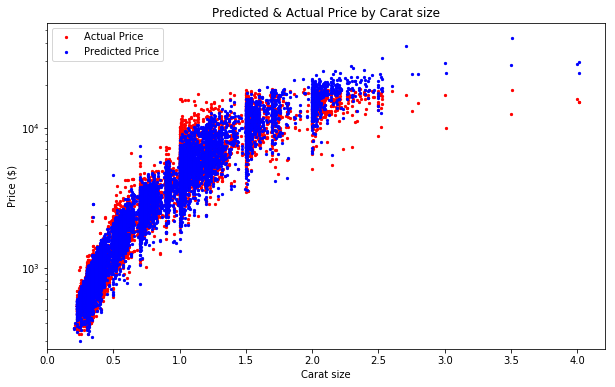

In [16]:
df_plot = df
df_train, df_test = train_test_split(df_plot, test_size=0.2, random_state=42)


y_plot = df_test['price']
X_plot = df_test.drop(['price'], axis=1)

plt.rcParams['figure.figsize'] = (10,6)
plt.scatter(X_plot['carat'], np.exp(y_plot), s=5, color='red', label = 'Actual Price')
plt.scatter(X_plot['carat'], np.exp(regr.predict(X_plot)), s=5, color='blue', label = 'Predicted Price')
plt.title('Predicted & Actual Price by Carat size')
plt.xlabel('Carat size')
plt.ylabel('Price ($)')
plt.semilogy()
plt.legend(loc='best')
plt.show()

Probamos ahora con otros modelos: Random forest y Gradient Boosting.

In [17]:
############################################## Random Forest ###############

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.9914


In [18]:
############################################## Gradient Boosting ###############

from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.9861
